In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping

from lightgbm import LGBMRegressor
import random
import xgboost as xgb

In [2]:
curr_dir = os.getcwd()
curr_dir

'C:\\weather\\uv_new'

In [7]:
forders_tr = os.listdir(curr_dir+"\\data\\"+"\\fin_train_val")
forders_tr

['uv_train.csv']

In [9]:
train = pd.DataFrame()

for files in forders_tr:
    df= pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\fin_train_val\\")+files)
    train = pd.concat([train, df])
    
# train.drop('idx', axis=1, inplace=True)
train

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20200101,0,13,126.16000,33.30000,0.0,0.00000,0.00000,0.00000,-0.00075,...,250.75924,269.97608,269.70811,268.61702,259.10334,165.17963,38.96359,-9.50910,71.00,0
1,20200101,0,105,128.89098,37.75147,0.0,-0.00057,0.00057,0.00030,-0.00030,...,246.67115,268.22810,268.41686,268.01723,256.99670,163.20549,43.95463,-9.40930,26.04,3
2,20200101,0,108,126.96500,37.57100,0.0,0.00000,0.00000,-0.00089,-0.00075,...,241.24994,258.33982,258.18692,257.58363,250.50021,162.48279,43.77999,-9.37761,85.50,3
3,20200101,0,112,126.62490,37.47772,0.0,-0.00057,-0.00057,-0.00060,0.00015,...,241.55488,258.54927,258.64012,258.03883,251.00820,162.39995,43.67046,-9.37422,68.99,3
4,20200101,0,115,130.89864,37.48129,0.0,0.00000,-0.00057,-0.00030,0.00075,...,244.56708,264.88004,263.95472,262.33534,253.25397,164.19725,43.74521,-9.45200,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533607,20211231,2350,146,127.11900,35.84080,0.1,-0.00057,0.00000,-0.00060,0.00000,...,244.71129,264.82744,264.95943,264.36433,254.82929,162.52921,41.81018,-8.87355,62.90,3
1533608,20211231,2350,152,129.33472,35.58250,0.0,0.00000,0.00000,-0.00179,-0.00015,...,241.75728,259.19303,257.86443,257.39333,249.08495,163.96606,41.52495,-8.99640,82.00,2
1533609,20211231,2350,156,126.89158,35.17294,0.0,0.00000,0.00000,0.00000,0.00105,...,242.90744,260.33453,260.00405,259.18646,250.92709,162.84572,41.04849,-8.87987,72.38,3
1533610,20211231,2350,159,129.03203,35.10468,0.0,-0.00057,-0.00057,0.00089,-0.00015,...,242.68420,259.36253,258.24370,256.93511,247.71243,164.15158,40.96396,-8.99480,69.56,3


In [10]:
tr13 = train[train['stn']==13]
tr13

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20200101,0,13,126.16,33.3,0.0,0.00000,0.00000,0.00000,-0.00075,...,250.75924,269.97608,269.70811,268.61702,259.10334,165.17963,38.96359,-9.50910,71.0,0
15,20200101,10,13,126.16,33.3,0.0,-0.00057,0.00000,0.00119,-0.00015,...,249.26338,267.39961,267.63692,266.66849,258.21621,166.67178,38.96359,-9.50910,71.0,0
30,20200101,20,13,126.16,33.3,0.0,0.00000,0.00000,-0.00030,0.00030,...,249.61859,268.27856,268.19710,267.20654,258.38663,167.94722,38.96359,-9.50910,71.0,0
45,20200101,30,13,126.16,33.3,0.0,-0.00057,0.00000,-0.00030,0.00030,...,249.79544,268.44652,268.07856,267.50047,258.67009,168.93011,38.96359,-9.50910,71.0,0
60,20200101,40,13,126.16,33.3,0.0,-0.00113,-0.00057,-0.00119,-0.00030,...,249.86163,268.64762,268.58556,267.34496,258.50010,169.53722,38.96359,-9.50910,71.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533537,20211231,2310,13,126.16,33.3,0.0,-0.00113,0.00057,0.00000,0.00000,...,237.34683,249.40735,247.69928,246.54564,242.35466,156.05597,38.96359,-8.88492,71.0,0
1533552,20211231,2320,13,126.16,33.3,0.0,0.00000,-0.00057,-0.00060,-0.00105,...,239.30603,251.95026,249.51067,247.96883,243.12601,158.01080,38.96359,-8.88492,71.0,0
1533567,20211231,2330,13,126.16,33.3,0.0,-0.00057,-0.00057,0.00089,-0.00015,...,239.46403,252.96278,250.84725,248.64059,243.73861,159.91946,38.96359,-8.88492,71.0,0
1533582,20211231,2340,13,126.16,33.3,0.0,-0.00057,-0.00057,0.00030,-0.00015,...,239.04169,252.03346,250.09823,248.36829,243.54213,161.76646,38.96359,-8.88492,71.0,0


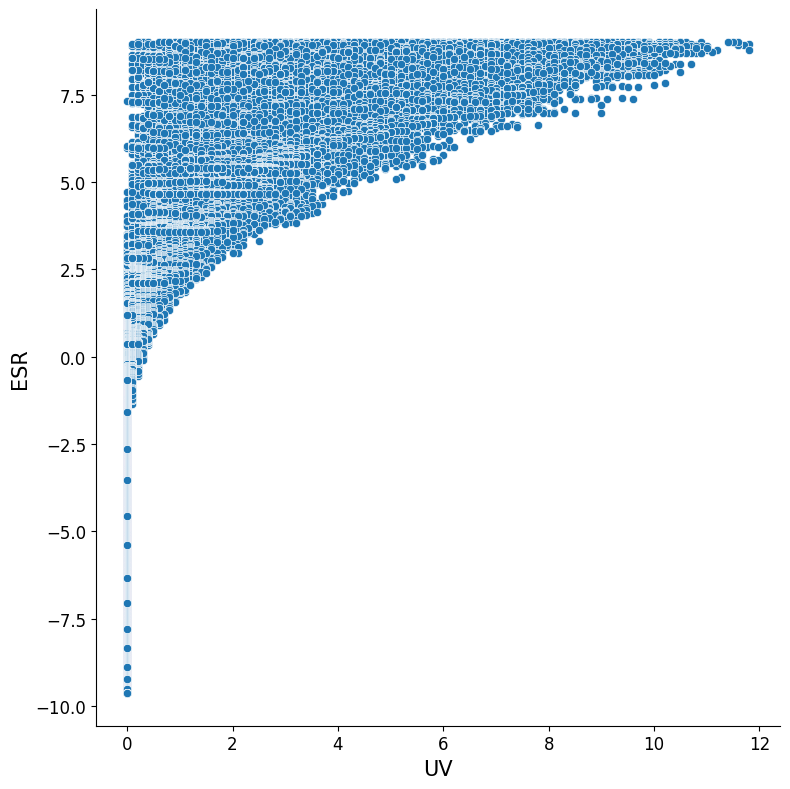

In [31]:
sns.relplot(x="uv", y='esr', height=8, data=tr13)
# plt.title("13")

plt.xlabel('UV', fontsize=15)
plt.ylabel('ESR', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
# plt.title('STN=13', fontsize=15)
plt.savefig('13_dis.png')
# plt.xlabel(fontsize=13)
plt.show()

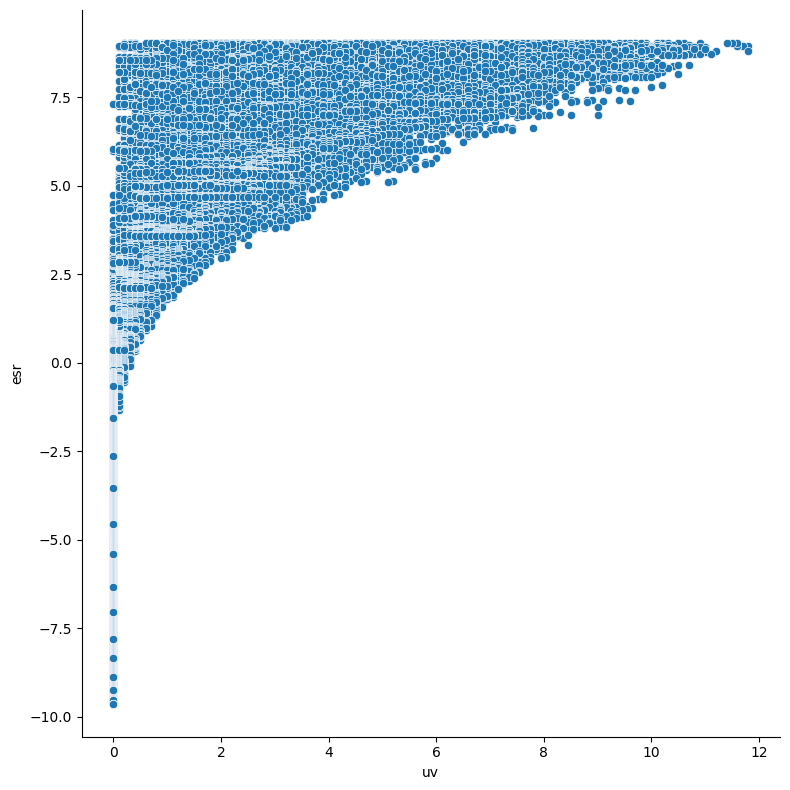

In [25]:
sns.relplot(x="uv", y='esr', height=8, data=tr13)
# plt.title("13")
# plt.tight_layout()
# plt.savefig('13_dis.png')
# plt.xlabel(fontsize=13)
plt.show()